# Set-up


In [ ]:
!pip install easyocr
!pip install opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 54.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 17.6 MB/s eta 0:00:00


In [ ]:
!pip install label-studio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 MB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.5/64.5 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 392.9/392.9 kB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 56.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.3/130.3 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 57.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.9/160.9 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.3/120.3 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.3/173.3 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 6.1 MB/s eta 0:

In [ ]:
from google.colab import drive
import easyocr
from pathlib import Path
import cv2
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
from tqdm import tqdm
import json
import os
from math import floor, ceil
import uuid

# EasyOcr'ing

In [ ]:
reader = easyocr.Reader(['ru'])

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.1% Complete

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset_path = Path('/content/drive/MyDrive/receipt_dataset/train/')
image_path = list(dataset_path.glob('*.jpg'))[0]
print(image_path)

/content/drive/MyDrive/receipt_dataset/train/dns_receipt.jpg


In [ ]:
ocr_result = reader.readtext(str(image_path))
print(ocr_result)

[([[606, 187], [905, 187], [905, 274], [606, 274]], '[&З  2350', 0.30842632749658205), ([[145, 242], [488, 242], [488, 345], [145, 345]], 'Ростов-на', 0.9999812266485049), ([[480, 283], [511, 283], [511, 307], [480, 307]], '=', 0.1429713351063464), ([[500, 256], [666, 256], [666, 336], [500, 336]], 'ДОНУ', 0.5960975289344788), ([[709, 250], [1356, 250], [1356, 343], [709, 343]], 'РостовсКая обпасть', 0.5286833413570311), ([[289, 315], [487, 315], [487, 391], [289, 391]], 'пр-Кт', 0.9688161759740663), ([[490, 303], [1052, 303], [1052, 468], [490, 468]], 'Кась8на9?87990', 0.04384997033703718), ([[1061, 319], [1187, 319], [1187, 398], [1061, 398]], '2/2', 0.7318419633077492), ([[511, 392], [555, 392], [555, 442], [511, 442]], 'Т', 0.8700170891707195), ([[46, 421], [343, 421], [343, 497], [46, 497]], '02.05.23', 0.691674067292367), ([[502, 420], [696, 420], [696, 510], [502, 510]], '20: 16', 0.8864555985308317), ([[1097, 440], [1215, 440], [1215, 508], [1097, 508]], 'ЧЕК', 0.99999834818781

In [ ]:
def create_bounding_box(bbox_data):
    xs = []
    ys = []
    for x, y in bbox_data:
        xs.append(x)
        ys.append(y)

    left = int(min(xs))
    top = int(min(ys))
    right = int(max(xs))
    bottom = int(max(ys))

    return [left, top, right, bottom]

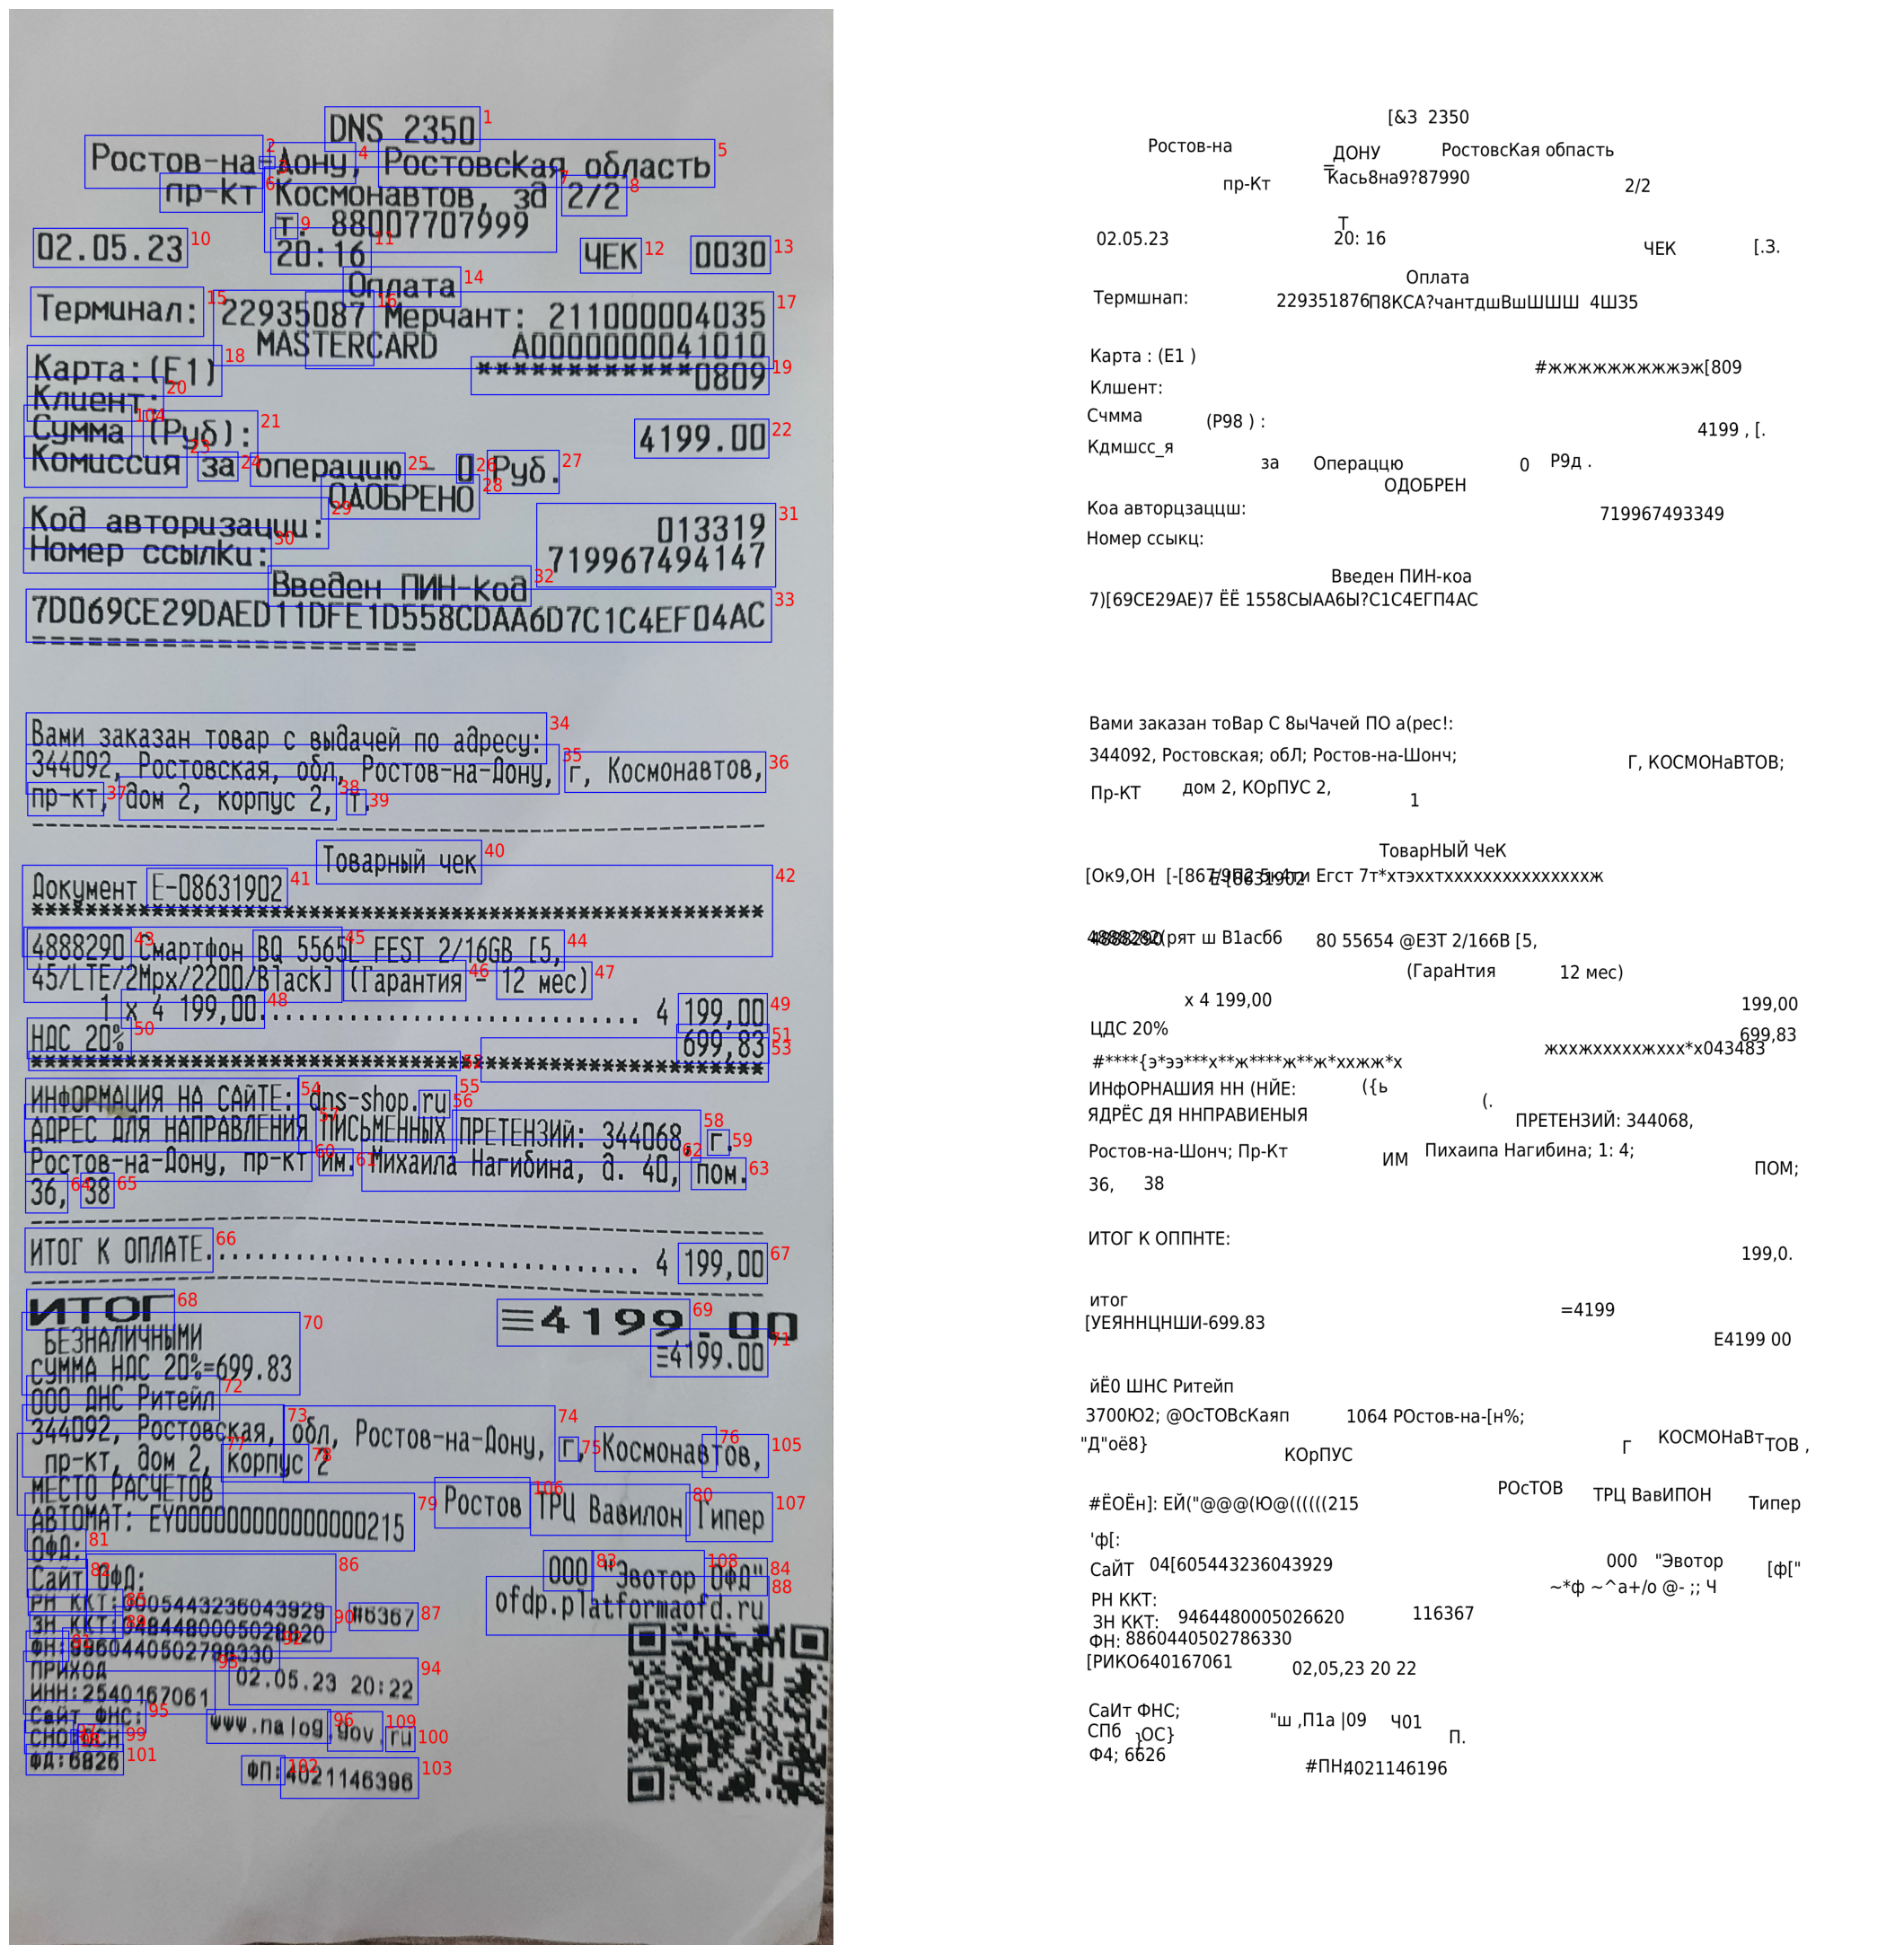

In [ ]:
font_path = Path(cv2.__path__[0]) / "qt/fonts/DejaVuSansCondensed.ttf"
font = ImageFont.truetype(str(font_path), size=35)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(28, 28))

left_image = Image.open(image_path).convert("RGB")
right_image = Image.new("RGB", left_image.size, (255, 255, 255))

left_draw = ImageDraw.Draw(left_image)
right_draw = ImageDraw.Draw(right_image)

for i, (bbox, word, confidence) in enumerate(ocr_result):
    box = create_bounding_box(bbox)

    left_draw.rectangle(box, outline="blue", width=2)
    left, top, right, bottom = box

    left_draw.text((right + 5, top), text=str(i + 1), fill="red", font=font)
    right_draw.text((left, top), text=word, fill="black", font=font)

ax1.imshow(left_image)
ax2.imshow(right_image)
ax1.axis("off");
ax2.axis("off");

In [ ]:
# saving results to ls json format

def convert_to_ls(image: Image, ocr_output):
  image_width, image_height = image.size
  results = []
  all_scores = []

  for i, (bbox, word, confidence) in enumerate(ocr_output):
    left, top, right, bottom = create_bounding_box(bbox)
    bbox_ls = {
        'x': 100 * left / image_width,
        'y': 100 * top / image_height,
        'width': 100 * (right - left) / image_width,
        'height': 100 * (bottom - top) / image_height,
        'rotation': 0
    }

    text = ' '.join([w for w in word.split()]).strip()
    if not text:
      continue

    region_id = str(uuid.uuid4())[:10]
    bbox_result = {
        'id': region_id, 'from_name': 'bbox', 'to_name': 'image',
        'type': 'rectangle', 'value': bbox_ls
        }
    transcription_result = {
        'id': region_id, 'from_name': 'transcription', 'to_name': 'image',
        'type': 'textarea', 'value': dict(text=[text]), 'score': confidence
        }
    results.extend([bbox_result, transcription_result])




In [ ]:
for i, (bbox, words, confidence) in enumerate(ocr_result):
  if i % 10 == 0:
    print(f'{i}; {bbox}; {words}; {confidence}')
    print(words.split())

0; [[606, 187], [905, 187], [905, 274], [606, 274]]; [&З  2350; 0.30842632749658205
['[&З', '2350']
10; [[502, 420], [696, 420], [696, 510], [502, 510]]; 20: 16; 0.8864555985308317
['20:', '16']
20; [[257, 772], [478, 772], [478, 862], [257, 862]]; (Р98 ) :; 0.5521355786534169
['(Р98', ')', ':']
30; [[1013, 950], [1473, 950], [1473, 1112], [1013, 1112]]; 719967493349; 0.8735966600925748
['719967493349']
40; [[264, 1652], [535, 1652], [535, 1728], [264, 1728]]; Е-[8631902; 0.9585809728107183
['Е-[8631902']
50; [[1282, 1952], [1460, 1952], [1460, 2028], [1282, 2028]]; 699,83; 0.97116355310099
['699,83']
60; [[595, 2192], [661, 2192], [661, 2244], [595, 2244]]; ИМ; 0.9312835747006846
['ИМ']
70; [[1232, 2538], [1458, 2538], [1458, 2631], [1232, 2631]]; Е4199 00; 0.262033837520283
['Е4199', '00']
80; [[34, 2923], [148, 2923], [148, 2999], [34, 2999]]; 'ф[:; 0.16794872283935547
["'ф[:"]
90; [[32, 3119], [115, 3119], [115, 3179], [32, 3179]]; ФН:; 0.7731328329785998
['ФН:']
100; [[32, 3337], 

In [ ]:
def create_image_url(filepath):
    filename = os.path.basename(filepath)
    return f'http://localhost:8081/{filename}'

In [ ]:
# !label-studio start --port 8081